Nama : Satria Ishanda Subakti<br>
NIM : 211351135<br>
Kelas : TIF Pagi B

# import Dataset

In [48]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"satriaishandasubakti","key":"f714982a67c4e0fa8a74f45e837555c4"}'}

In [49]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [50]:
!kaggle datasets download -d mathchi/churn-for-bank-customers

churn-for-bank-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
!mkdir churn-for-bank-customers
!unzip churn-for-bank-customers.zip -d churn-for-bank-customers
!ls churn-for-bank-customers

mkdir: cannot create directory ‘churn-for-bank-customers’: File exists
Archive:  churn-for-bank-customers.zip
replace churn-for-bank-customers/churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: churn-for-bank-customers/churn.csv  
churn.csv


# import library yang digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# Data Discovery

In [54]:
df = pd.read_csv('churn-for-bank-customers/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [56]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [57]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
df.shape

(10000, 14)

In [59]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [60]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# EDA (minimal 5)

<Axes: >

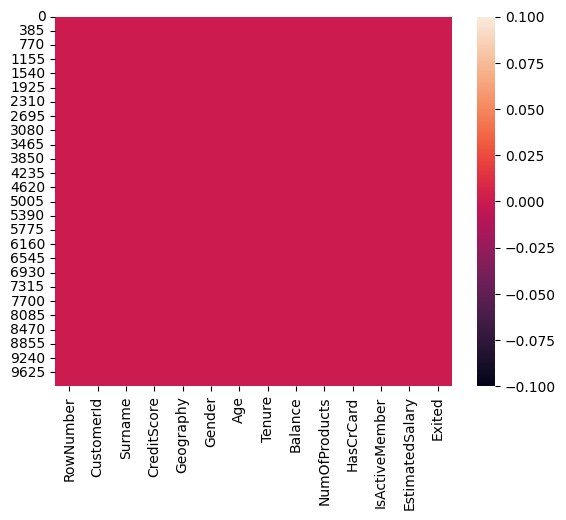

In [61]:
sns.heatmap(df.isnull())

<ipython-input-62-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

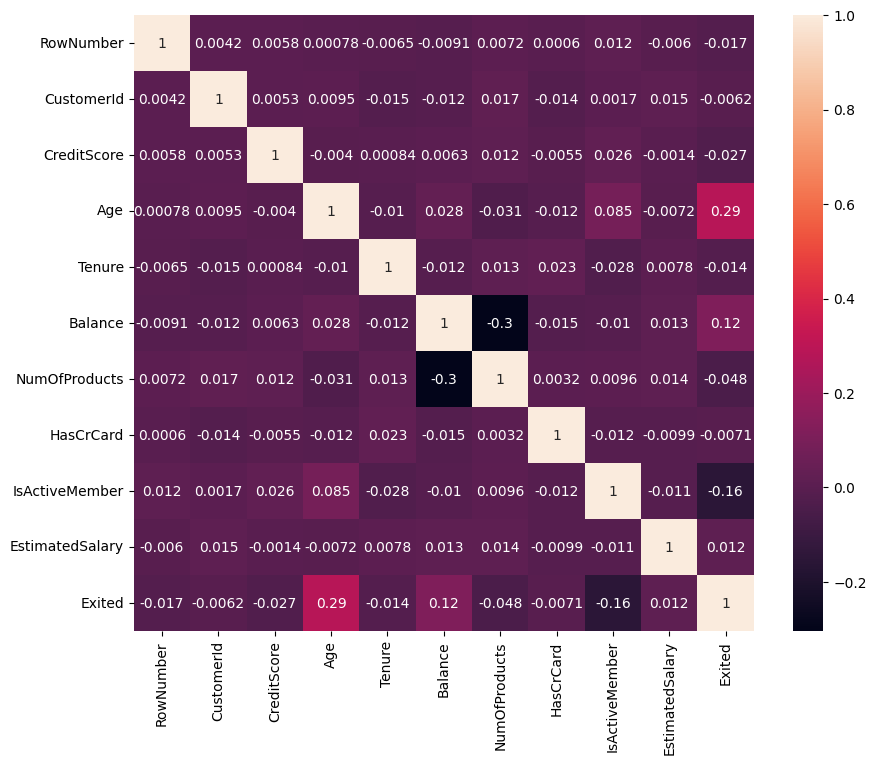

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

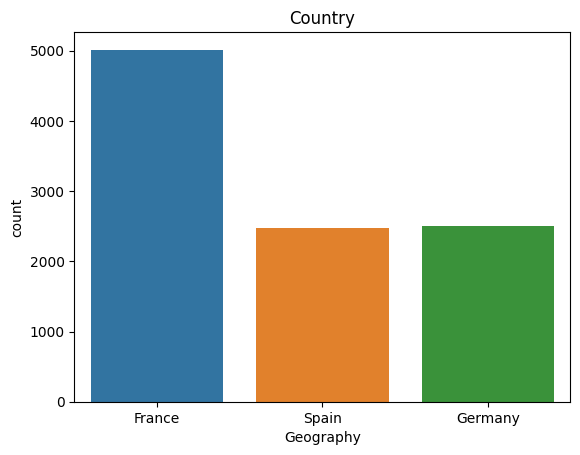

In [63]:
sns.countplot(x=df['Geography'])
plt.title('Country')
plt.show()

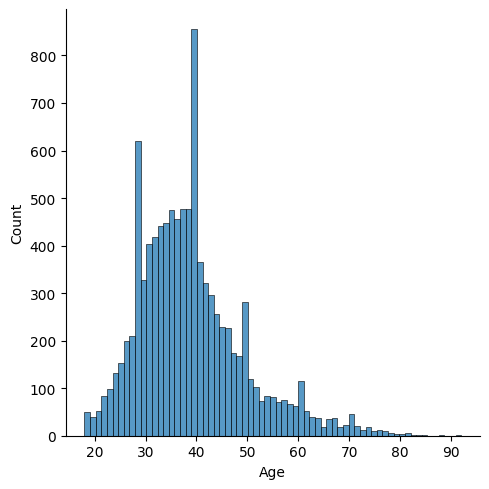

In [64]:
sns.displot(df, x='Age')

<Axes: xlabel='Age', ylabel='Exited'>

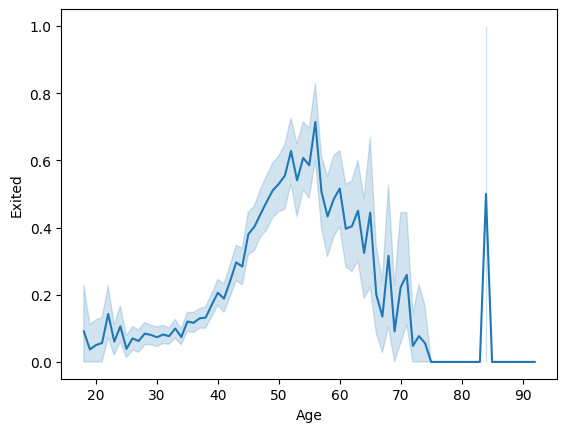

In [65]:
sns.lineplot(x=df['Age'], y=df['Exited'])

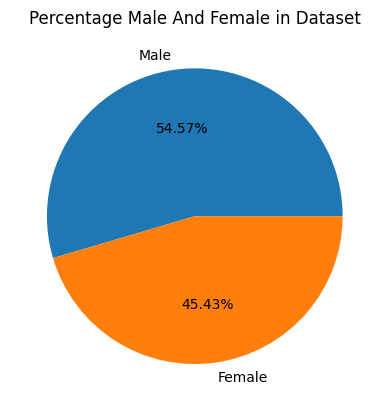

In [66]:
plt.title('Percentage Male And Female in Dataset')
plt.pie(df['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%.2f%%')
plt.show()

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

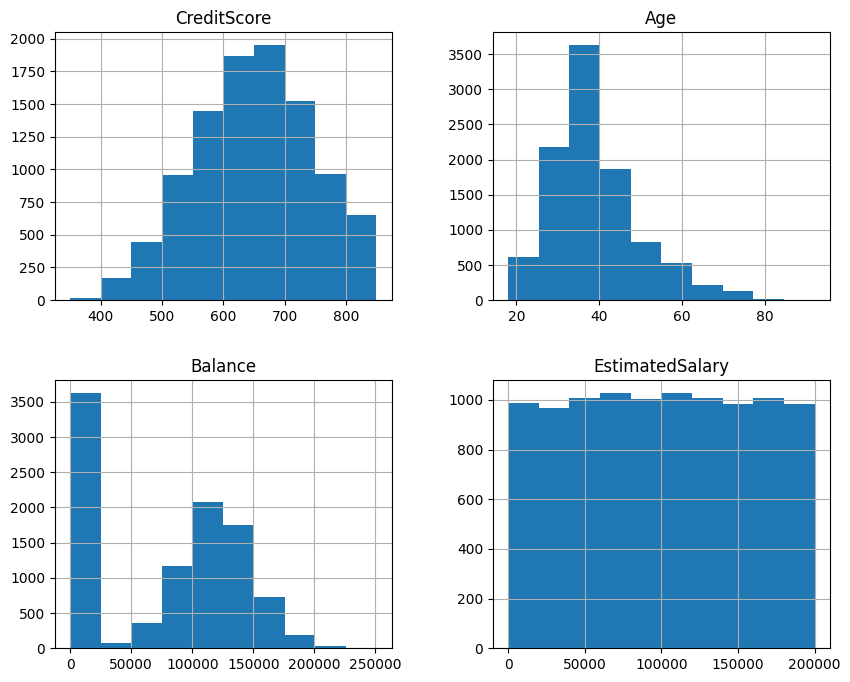

In [67]:
number_list = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[number_list].hist(figsize=(10,8))

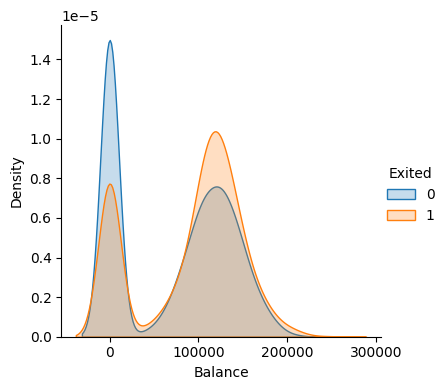

In [68]:
(sns.FacetGrid(df, hue='Exited', height = 4).map(sns.kdeplot,"Balance", fill=True).add_legend())

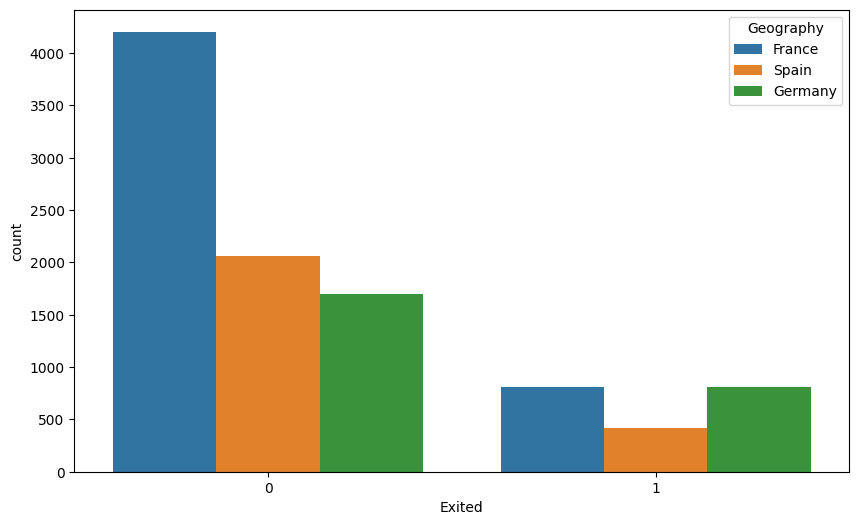

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Exited'], hue='Geography', data=df)
plt.show()

# Preprocessing

In [70]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [72]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [75]:
numerical = []
categorycols = []

for col in df.columns:
  if df[col].dtype=="object":
    categorycols.append(col)
  else:
    numerical.append(col)

for col in df.columns:
  if col in numerical:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [76]:
numerical

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [77]:
categorycols

['Geography', 'Gender']

In [78]:
ind_col = [col for col in df.columns if col != 'Exited']
dep_col = 'Exited'

In [79]:
df[dep_col].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [80]:
le = LabelEncoder()

for col in categorycols:
  df[col] = le.fit_transform(df[col])

In [81]:
df['Exited'] = le.fit_transform(df['Exited'])

In [82]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [83]:
x = df[ind_col] #feature
y = df[dep_col] #label
x.shape, y.shape

((10000, 10), (10000,))

# modeling

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [85]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

y_pred = model.predict(x_test)

In [86]:
print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

akurasi data training = 0.847875
akurasi data testing = 0.855 



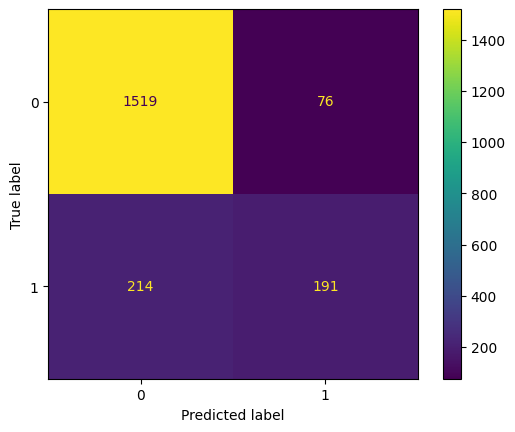

In [87]:
labels = ['0', '1']
confusmat = confusion_matrix(y_test, y_pred)
dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confusmat, display_labels=labels)
dis.plot()

In [88]:
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.47      0.57       405

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [89]:
input_data =(822,	0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction==0):
  print('Nasabah tetap memilih bank tersebut')
else:
  print('Nasabah beralih dari bank tersebut')

[0]
Nasabah tetap memilih bank tersebut


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

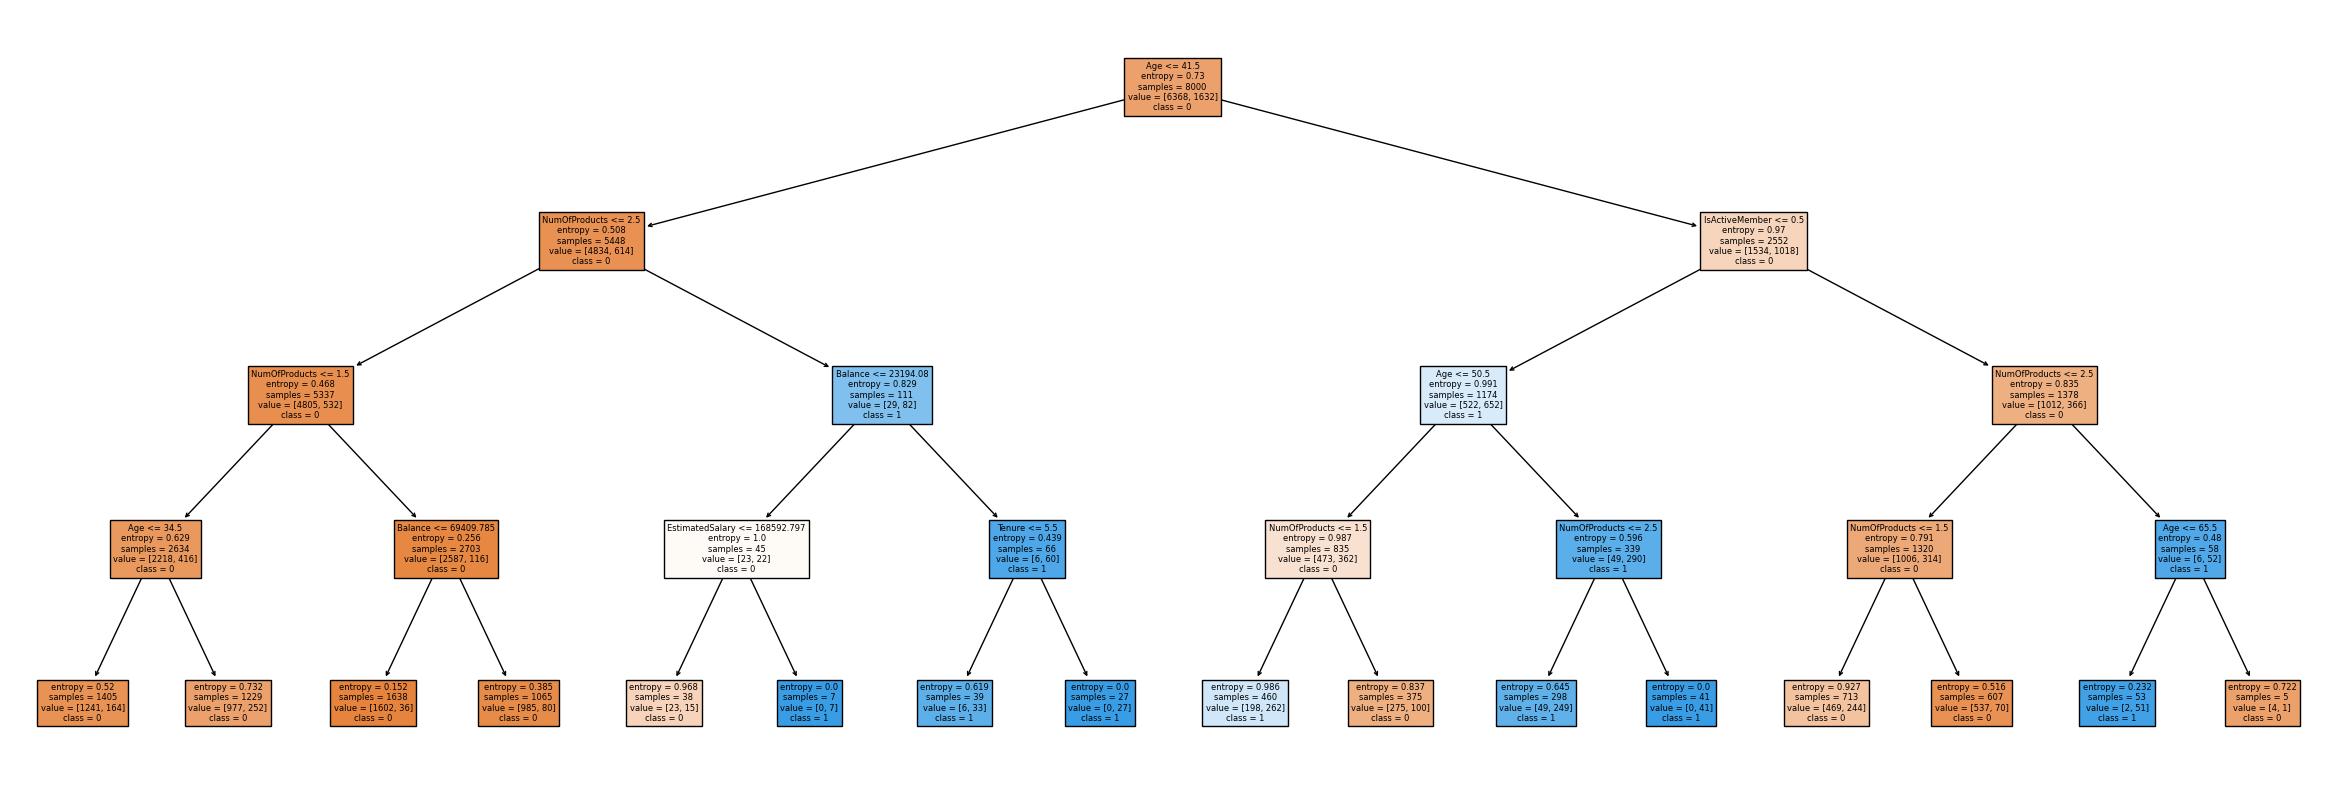

In [90]:
fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['0','1'],
                   filled=True
)

# save model (CSV)

In [91]:
df.to_csv('customer-churn.csv', index=False)